<a href="https://colab.research.google.com/github/owenrussell/clustranalyssworld-hapines/blob/main/autotraderanalsysiss_cwk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook i will display and commentate on the process of importing, cleaning and analysing a dataset.

The dataset in question is from AutoTraders car advert sales data and contains 402,005 observations.

Functions from the appropriate imported packages will aid with the analysis in forming various plots and graphs.


Importing necessary packages and using aliases for ease of use

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading in the data from Google Drive using pandas so that it can be manipulated as a data frame

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/adverts.csv')

Assessing a few sample rows so that i can view the different columns and get a feel for the data

In [ ]:
data.sample(7)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
212421,2.020100e+14,42100.0,67,Grey,MINI,Hatch,USED,2017.0,10241,Hatchback,False,Petrol
236486,2.020090e+14,61000.0,8,Silver,Renault,Twingo,USED,2008.0,1695,Hatchback,False,Petrol
129794,2.020100e+14,1000.0,70,Grey,Mercedes-Benz,GLC Class,USED,2020.0,42980,SUV,False,Diesel
74109,2.020090e+14,956.0,70,NaN,Land Rover,Range Rover Evoque,USED,2020.0,37000,SUV,False,Diesel
233459,2.020090e+14,2771.0,20,White,Toyota,Corolla,USED,2020.0,25000,Estate,False,Petrol Hybrid
104991,2.020090e+14,82956.0,63,White,Nissan,Juke,USED,2013.0,5233,SUV,False,Petrol
359297,2.020100e+14,36368.0,67,Red,Vauxhall,Crossland X,USED,2018.0,10475,SUV,False,Diesel


The info function helpfully shows the structure of the dataset and the various types of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  float64
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 34.1+ MB


Lots of information can be gained from this output:

Mileage, Registration year, Price, and Public reference are all listed as floats/ints. Therefore, these features can be easily analysed with statistics as they are numerical.

The other features are of type - object. This means they are strings and will be used as categorical variables. The crossover car and van column is actually a boolean, but it does not add further knowledge so i will ignore it.

Public reference is of type - float but it should not be used for analysis. As its sole purpose is to identify the different cars. This column can then be set as the index because it is not useful analytically within the dataframe.

The Non-Null count column indicates the amount of missing values variables for each variable. Most notably - Year of registration & Reg code, have about 30 thousand null values. This may be due to brand new cars not being fully registered yet.

In [ ]:
data.set_index('public_reference').head(2)

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,,
2.020060e+14,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
2.020070e+14,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel


As discussed above, here i transformed the dataset by using the public reference column as the index.

In [ ]:
data.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

Here i use the isnull function and the missingno package to further investigate the missing values in my data.

Assessing the missing values matrix plot, it can be seen that the missing values account for a small amount in proportion to the total volume of data.

Even if i wanted to deal with the Reg code & Year of registration missing values, it would be difficult to impute values. For example, imputing a median value of Reg code would not make sense.

Hence, i will not be overly worried about this affecting the analysis.

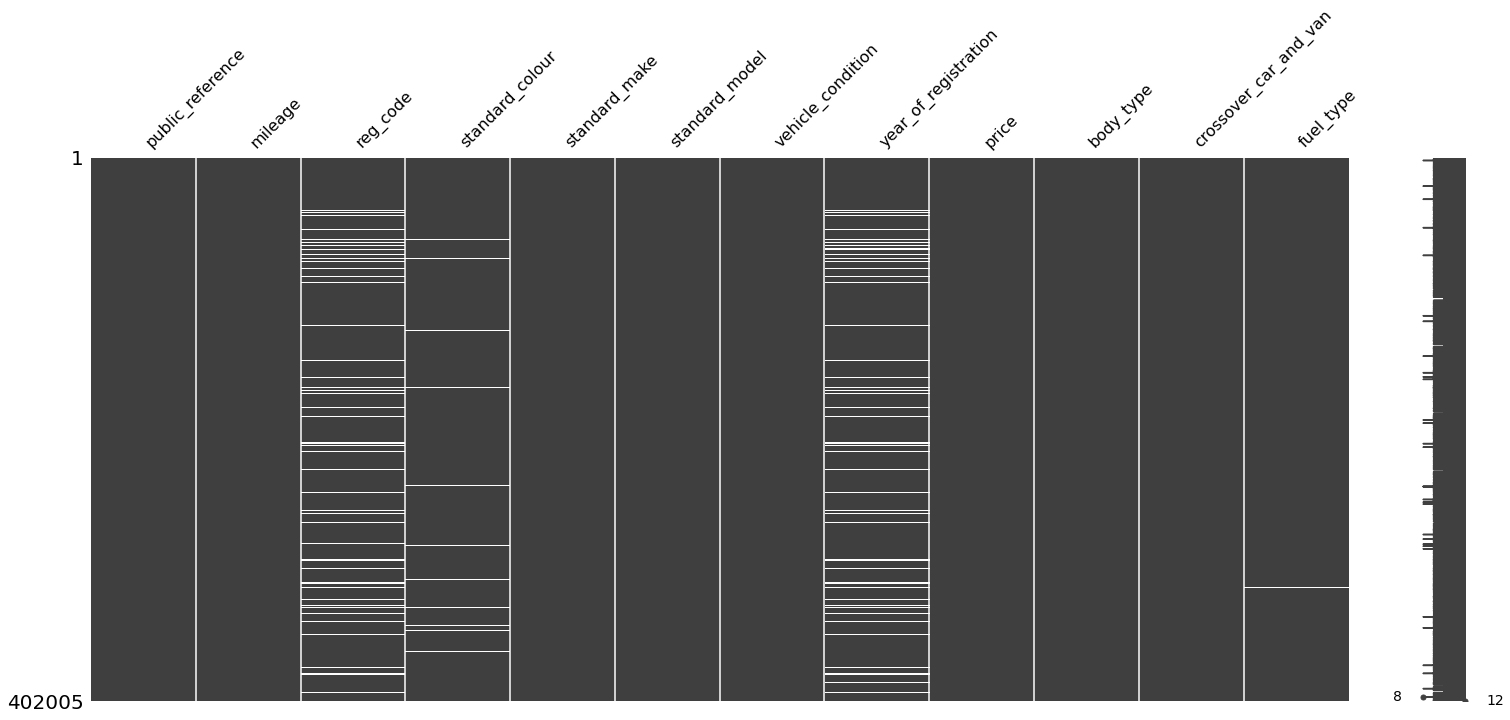

In [ ]:
import missingno as msno
msno.matrix(data);

The Describe function gives a concise statistical summary of the numerical variables.





In [ ]:
data.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020069e+14,37743.595656,2015.006206,1.734197e+04
std,1.691466e+10,34831.724018,7.962667,4.643746e+04
min,2.013070e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020090e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020100e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


Looking at the summary column for Year of registration, there is clearly an error because the minimum value is 999.

As cars did not exist in the middle ages, the range of data will need visualised and then filtered accordingly.

Similarly with the mileage summary,  maximum mileage is 999,999.

This is likely to be an error, cars for sale are not likely to have as much mileage as this.

Again, with the price maximum value, £9,999,999 seems unlikely and could be erroneous.

Below, i will use Seaborns boxplots and quantiles to visualise and locate the possible outliers.

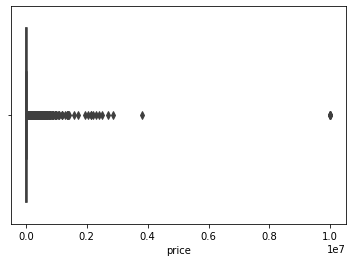

In [ ]:
sns.boxplot(x=data['price']);

In [ ]:
price_999985percentile = data['price'].quantile(0.999985)
price_999985percentile
data.loc[ data['price']> price_999985percentile ].sort_values('price').head(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
198060,2.020080e+14,300.0,17,NaN,Ferrari,LaFerrari,USED,2017.0,3799995,NaN,False,NaN
141833,2.020070e+14,87450.0,NaN,Red,Ferrari,250,USED,NaN,9999999,Coupe,False,Petrol
147188,2.020090e+14,100.0,NaN,Grey,Maserati,3500,USED,NaN,9999999,Convertible,False,Petrol
252505,2.020080e+14,46300.0,NaN,Blue,Ferrari,275,USED,NaN,9999999,Coupe,False,Petrol
305436,2.018120e+14,3600.0,NaN,Grey,Lamborghini,Miura,USED,NaN,9999999,Coupe,False,Petrol
336202,2.020010e+14,950.0,NaN,Black,Ferrari,LaFerrari,USED,NaN,9999999,Coupe,False,Petrol
336536,2.020060e+14,4400.0,NaN,White,Porsche,959,USED,NaN,9999999,Coupe,False,Petrol


In [ ]:
data = data[data['price'] < 9999999]

Judging from both the boxplot and the top 6 highest values for price, i am going to assume these are errors and filter them out. 

This is because a price of £9.99 million does not seem reasonable, especisally compared with the next most pricey car (£3.8 million), and may be data entry mistakes.

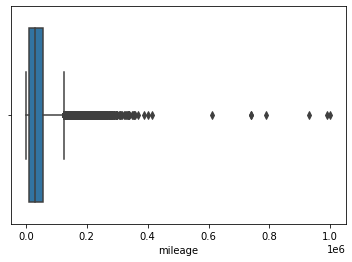

In [ ]:
sns.boxplot(x=data['mileage']);

In [ ]:
mileage_999985percentile = data['mileage'].quantile(0.999985)
mileage_999985percentile
data.loc[ data['mileage']> mileage_999985percentile ].sort_values('mileage').head(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
333167,2.020100e+14,611121.0,13,White,Fiat,500,USED,2013.0,4500,Hatchback,False,Petrol
115277,2.020100e+14,740000.0,14,Blue,Volvo,XC90,USED,2014.0,14795,SUV,False,Diesel
240577,2.020090e+14,740000.0,11,White,Mercedes-Benz,E Class,USED,2011.0,10500,Convertible,False,Diesel
131508,2.020100e+14,788072.0,68,Blue,MINI,Countryman,USED,2018.0,22875,SUV,False,Petrol
85043,2.020100e+14,930000.0,56,Blue,BMW,1 Series,USED,2006.0,2500,Hatchback,False,Petrol
63569,2.020100e+14,990000.0,7,Red,Vauxhall,Zafira,USED,2007.0,1200,MPV,False,Diesel
43974,2.020080e+14,999999.0,63,White,Vauxhall,Astra,USED,2013.0,9999,Hatchback,False,Diesel


In [ ]:
data = data[data['mileage'] < 611121 ]

Assesing the top percentiles and the boxplot for mileage, i beleive these extreme values could be real (apart from the 999999 result). 

However, they are so extreme that they massively skew the distribution so i will remove them as outliers.

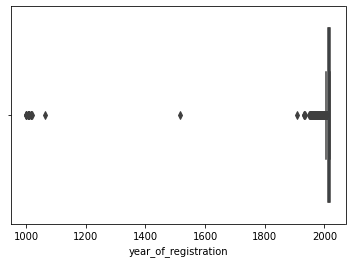

In [ ]:
sns.boxplot(x=data['year_of_registration']);

In [ ]:
year_0005percentile = data['year_of_registration'].quantile(0.005)
year_0005percentile
data.loc[ data['year_of_registration']< year_0005percentile ].sort_values('year_of_registration').head(20)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
201626,2.020100e+14,69346.0,64,Red,Mazda,Mazda3,USED,999.0,8795,Saloon,False,Petrol
213059,2.020090e+14,54569.0,8,Silver,BMW,Z4,USED,999.0,7999,Convertible,False,Petrol
334679,2.020100e+14,107934.0,13,Blue,Audi,A3,USED,999.0,8895,Hatchback,False,Diesel
374798,2.020080e+14,58000.0,55,Silver,Toyota,RAV4,USED,1006.0,5994,SUV,False,Petrol
201773,2.020080e+14,19000.0,57,Silver,Mercedes-Benz,C Class,USED,1007.0,7295,Saloon,False,Petrol
339167,2.020060e+14,38000.0,57,White,MINI,Hatch,USED,1007.0,4795,Hatchback,False,Petrol
59010,2.020060e+14,14000.0,7,Blue,Toyota,Prius,USED,1007.0,7000,Hatchback,False,Petrol Hybrid
199987,2.020100e+14,104000.0,8,Silver,BMW,1 Series,USED,1008.0,4395,Convertible,False,Petrol
114737,2.020080e+14,30000.0,59,Red,Toyota,AYGO,USED,1009.0,4695,Hatchback,False,Petrol
199830,2.020090e+14,23000.0,59,Silver,MINI,Hatch,USED,1009.0,5995,Hatchback,False,Petrol


In [ ]:
data = data[data['year_of_registration'] > 1909 ]

Same as previously, the analysis of outliers for the year of registration brings up issues. 

There are multiple results with over a thousand years old, these can not be real obviously as cars were not around in the middle ages.

It is possible that the data entry has placed a '1' instead of a '2' when inputting data.

There are two cars that are almost 100 years old, but these cars (Austins) are real so is possible they are not mistakes.

,



Now, to investigate categorical variables using the value counts and bar plot functions in combination.

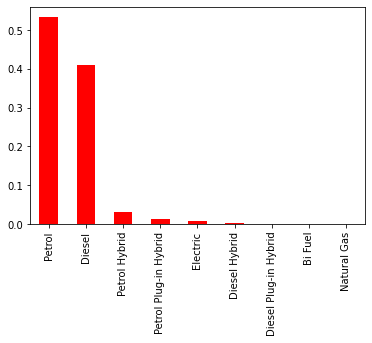

In [ ]:
data['fuel_type'].value_counts(normalize=True).plot.bar(color='red');

This normalised graph of fuel type illustrates the proprtion of cars that use various fuels.

 It is clear to see that most cars are still running on fossil fuels (Petrol & Diesel) with them taking up a ( > 90% ) share of the plot.

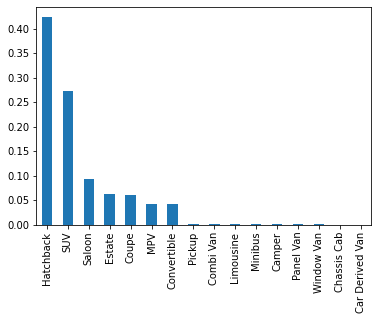

In [ ]:
data['body_type'].value_counts(normalize=True).plot.bar('blue');

From this plot it can be shown that the most common body types for cars are hatchbacks (roughly 2 in every 5), followed by SUVs (about 1 in every 5).

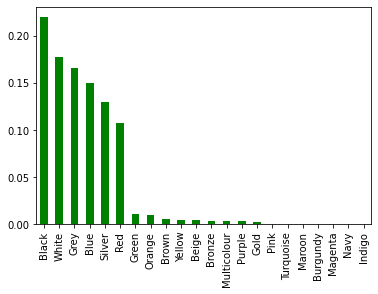

In [ ]:
data['standard_colour'].value_counts(normalize=True).plot.bar(color='green');

The 6 main colours for cars are: Black, White, Grey, Blue, Silver, Red.

Then followed by a huge dropoff in popularity in the other colours such as Green and Orange.

 Maybe people dont want to stand out from the crowd.

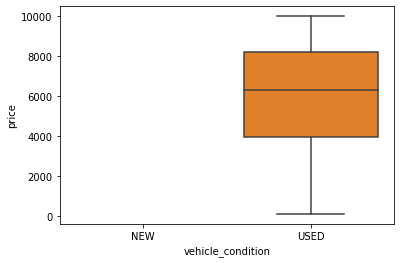

In [ ]:
sns.boxplot(x='vehicle_condition', y='price', data=data.loc[data['price']<10000],order=["NEW", "USED"] )

New cars are more expensive than used, for most cars (under 100k), as expected. I had the NEW boxplot there but it has vanished last minute..

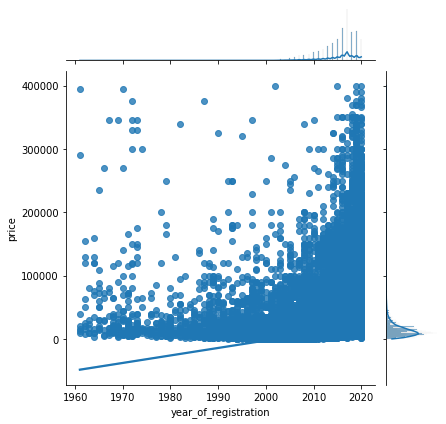

In [ ]:
dff = data[((data['price']<400000) & (data['year_of_registration']>1960))]
sns.jointplot(data=dff, x="year_of_registration", y="price", kind="reg");

To evaluate which features are the best predictors of price, scatterplots can be used to view the relationship between price and other numerical variables.

In the plot below i have excluded some data by reducing the range. This is to show more clearly the effect that Year of registration has on price.

As the Year of registration gets older, the price gets smaller (mainly). 

This suggests that the age of a car is a useful predictor of the price, this makes sense as brand new cars will have less faults so will be more valuable.

An expection to this would be vintage cars, which retain their value over time, as people consider these as timeless collectables. The points in the top left side of the graph may be explained by this (high price, old year).

The regression line supports this hypothesis as it has a positive gradient, suggesting an increase in year causes an increase in price.

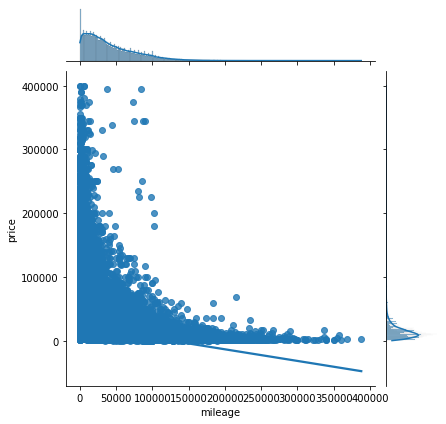

In [ ]:
dfff = data[((data['price']<400000) & (data['mileage']<400000))]
sns.jointplot(data=dfff, x='mileage', y='price', kind = 'reg');

Investigating the relationship between mileage and price:

At Min mileage (new) - the prices are the highest,

At Max mileage (old) - the prices are the lowest,

This is the inverse relationship shown in the graph. Price = 1 / mileage.

Makes complete sense as cars with more miles on their odometers will have been used more and therefore will have depreciated in quality.

Like in the Price ~  Year graph, i have had to filter out high outliers in the price and mileage columns. 

Regression line supports the claim as price extends below 0 for higher predicted mileage values. 

This regression line has a steeper gradient than the one in the plot above, suggesting that mileage is  better predictor for price than Year of registration is. This can be tested statistically later when comparing the correlation coefficients

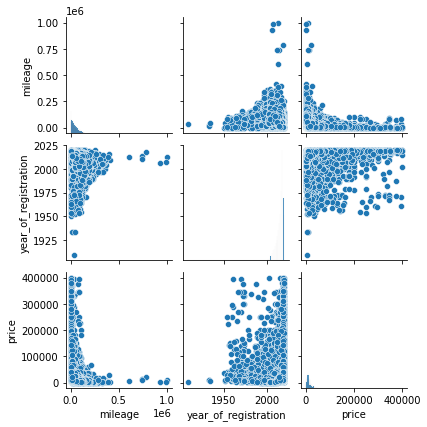

In [ ]:
cols = [ 'mileage', 'year_of_registration', 'price']
mask = (data['mileage']>0) & (data['year_of_registration']>0) & \
    (data['price']<400000)
df = data.loc[ mask, cols ]
sns.pairplot(df, height=2);

This pairplot includes the two graphs from above. As they are placed together,  one could compare visually which feature is a better predictor of price. As mileage is more of a smooth solid curve, it could be assumed as a better predictor then year of registration.

In [ ]:
data.corr(method='pearson')

,public_reference,mileage,year_of_registration,price,crossover_car_and_van
public_reference,1.000000,0.022267,0.040837,-0.083649,-0.022271
mileage,0.022267,1.000000,-0.684291,-0.259270,0.032767
year_of_registration,0.040837,-0.684291,1.000000,0.184611,-0.021053
price,-0.083649,-0.259270,0.184611,1.000000,0.021958
crossover_car_and_van,-0.022271,0.032767,-0.021053,0.021958,1.000000


The pairwise correlations are shown in the table above.

All the values in the pricd column represent how the other columns correlate with price. 

The higher the magnitude, the more correlation, and consequently a better predictor.

Mileage has the highest correlation with price (0.25), as predicted in the above analysis. 

Followed by Year of registration (0.18), which suggest this feature as the second best predictor of price

Now to try investigate relationsips between price and categorical variables

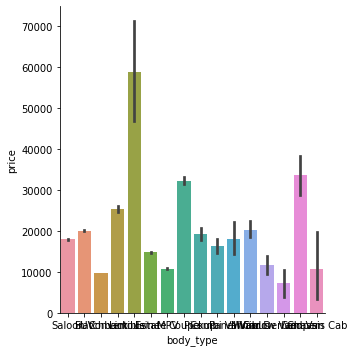

In [ ]:
sns.catplot(data=data, kind="bar", x="body_type", y="price")

I have attempted to display how different body types of cars are priced, however could nto work out the graph, my apologies.

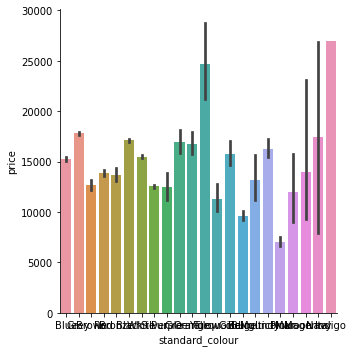

In [ ]:
sns.catplot(data=data, kind="bar", x="standard_colour", y="price")

Attemped to portray the relationship between colours of cars and price, but cant make it out from the graph, sorry.

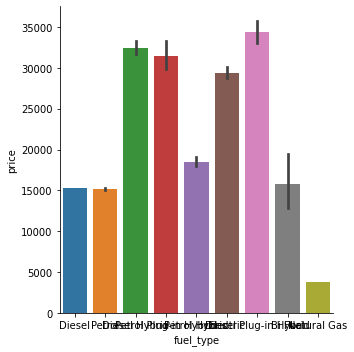

In [ ]:
sns.catplot(data=data, kind="bar", x="fuel_type", y="price");

Same again, had problems with the x labels width and x axis.

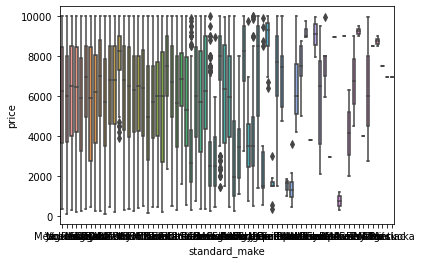

In [ ]:
sns.boxplot(x='standard_make', y='price', data=data.loc[ data['price']<10000 ], width=0.5);

There are a surprising amount of different car makes, cant work out anything from that graph sorry.


..

To conclude and summarise:

I believe mileage to be the best predictor for the price of a car. Closely followed by the Year of registration and its condition (NEW/USED).

I believe i explained the data cleaning and inspection process to a high degree, and the relationships between numerical variables.

However, have let myself down at the end when comparing price with the other categorical features.

I need to spend more time on the intricacies of graphs using categorical features.